In [1]:
from abc import ABC

import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\AnCodeRR\PYTORCH_NOTEBOOKS\Data\NYCTaxiFares.csv")

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude','pickup_longitude','dropoff_latitude', 'dropoff_longitude')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [11]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [12]:
df['pickup_datetime']

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
5        2010-04-22 08:39:47+00:00
6        2010-04-23 19:27:00+00:00
7        2010-04-15 09:03:37+00:00
8        2010-04-20 08:58:00+00:00
9        2010-04-16 18:50:16+00:00
10       2010-04-22 22:26:23+00:00
11       2010-04-15 17:40:18+00:00
12       2010-04-23 12:12:08+00:00
13       2010-04-18 02:35:26+00:00
14       2010-04-21 10:12:59+00:00
15       2010-04-20 23:31:17+00:00
16       2010-04-15 21:54:26+00:00
17       2010-04-15 08:55:51+00:00
18       2010-04-14 23:12:52+00:00
19       2010-04-14 01:22:00+00:00
20       2010-04-20 11:27:29+00:00
21       2010-04-12 09:37:56+00:00
22       2010-04-13 13:55:05+00:00
23       2010-04-20 16:33:00+00:00
24       2010-04-21 14:03:52+00:00
25       2010-04-24 09:16:19+00:00
26       2010-04-11 21:38:28+00:00
27       2010-04-22 23:36:50+00:00
28       2010-04-23 

In [13]:
my_time = df['pickup_datetime'][0]

In [14]:
my_time

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [15]:
type(my_time)

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
my_time.hour

8

In [17]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [18]:
df['Hour'] = df['EDTdate'].dt.hour

In [19]:
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')

In [20]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [21]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')
# df['Weekday'] = df['EDTdate'].dt.dayofweek # This gives us day of week as the number

In [22]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [23]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [24]:
# Categorical columns.
cat_cols = ['Hour','AMorPM','Weekday']
# Continuous columns.
cont_cols = ['pickup_longitude','pickup_latitude', 'dropoff_longitude','dropoff_latitude','passenger_count','dist_km']

In [25]:
y_col = ['fare_amount']

In [26]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [27]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [28]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [29]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [30]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [31]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [32]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [33]:
df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
5         4
6         0
7         4
8         5
9         0
10        4
11        4
12        0
13        2
14        6
15        5
16        4
17        4
18        6
19        5
20        5
21        1
22        5
23        5
24        6
25        2
26        3
27        4
28        0
29        5
         ..
119970    3
119971    4
119972    0
119973    2
119974    2
119975    5
119976    5
119977    5
119978    3
119979    6
119980    6
119981    4
119982    6
119983    6
119984    0
119985    1
119986    0
119987    1
119988    3
119989    2
119990    3
119991    1
119992    0
119993    1
119994    3
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [34]:
type(df['Weekday'].cat.codes)

pandas.core.series.Series

In [35]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [36]:
type(df['Weekday'].cat.codes.values)

numpy.ndarray

In [37]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [38]:
cats = np.stack([hr,ampm,wkdy], axis=1)

In [39]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [40]:
# One liner for what we did above. Now we just have to take care of cat_cols.
cats = np.stack([df[col].cat.codes.values for col in cat_cols], axis=1)

In [41]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [42]:
cats = torch.tensor(cats, dtype=torch.int64)

In [43]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)

In [44]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [45]:
conts = torch.tensor(conts, dtype=torch.float)

In [46]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [47]:
y = torch.tensor(df[y_col].values, dtype=torch.float)

In [48]:
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [49]:
cats.shape

torch.Size([120000, 3])

In [50]:
conts.shape

torch.Size([120000, 6])

In [51]:
y.shape

torch.Size([120000, 1])

In [52]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [53]:
cat_szs

[24, 2, 7]

In [54]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [55]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [56]:
catz = cats[:2]

In [57]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [58]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni, nf in emb_szs])

In [59]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [60]:
embeddingz = []
for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [61]:
embeddingz

[tensor([[ 0.8417, -0.2042, -1.2075, -0.4558, -1.6138, -0.9138,  0.2302, -0.0388,
           0.9437,  2.3740, -0.8865, -0.3790],
         [-0.5228, -0.7060,  1.3195, -2.0906, -0.5003, -0.7790,  0.1187,  0.0507,
           1.3618, -0.1708, -1.4012, -0.8241]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.0074],
         [-1.0074]], grad_fn=<EmbeddingBackward>),
 tensor([[-2.5639, -0.2959, -0.0327,  1.2346],
         [ 1.6201,  1.2422,  1.4174,  0.2185]], grad_fn=<EmbeddingBackward>)]

In [62]:
z = torch.cat(embeddingz, 1)

In [63]:
z

tensor([[ 0.8417, -0.2042, -1.2075, -0.4558, -1.6138, -0.9138,  0.2302, -0.0388,
          0.9437,  2.3740, -0.8865, -0.3790, -1.0074, -2.5639, -0.2959, -0.0327,
          1.2346],
        [-0.5228, -0.7060,  1.3195, -2.0906, -0.5003, -0.7790,  0.1187,  0.0507,
          1.3618, -0.1708, -1.4012, -0.8241, -1.0074,  1.6201,  1.2422,  1.4174,
          0.2185]], grad_fn=<CatBackward>)

In [64]:
selfembdrop = nn.Dropout(0.4) # Randomly sets some values as 0 with a probability of 40%

In [65]:
z = selfembdrop(z) # Some values set to 0 with probability 40%

In [66]:
z

tensor([[ 1.4029, -0.3403, -2.0125, -0.7597, -2.6897, -0.0000,  0.0000, -0.0000,
          1.5728,  3.9566, -1.4774, -0.6317, -1.6790, -4.2732, -0.0000, -0.0546,
          0.0000],
        [-0.8714, -1.1766,  2.1992, -3.4844, -0.8338, -0.0000,  0.1979,  0.0845,
          0.0000, -0.0000, -2.3353, -0.0000, -1.6790,  2.7002,  0.0000,  2.3624,
          0.3641]], grad_fn=<MulBackward0>)

In [67]:
class TabluarModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum([nf for ni, nf in emb_szs])
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append((nn.Linear(layers[-1],out_sz)))
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))

        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [68]:
torch.manual_seed(33)

In [69]:
model = TabluarModel(emb_szs, conts.shape[1],1,[200,100],p=0.4)

In [70]:
model

TabluarModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [71]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [72]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [73]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [74]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [75]:
import time

start_time = time.time()
epochs = 300
losses = []

for i in range(epochs):
    i += 1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt((criterion(y_pred, y_train)))
    losses.append(loss)

    if i%10 == 1:
        print(f'Epoch: {i} and Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration} seconds')

Epoch: 1 and Loss: 12.497302055358887
Epoch: 11 and Loss: 12.161754608154297
Epoch: 21 and Loss: 11.738947868347168
Epoch: 31 and Loss: 11.324264526367188
Epoch: 41 and Loss: 10.908209800720215
Epoch: 51 and Loss: 10.477201461791992
Epoch: 61 and Loss: 10.076432228088379
Epoch: 71 and Loss: 9.711333274841309
Epoch: 81 and Loss: 9.359756469726562
Epoch: 91 and Loss: 9.048919677734375
Epoch: 101 and Loss: 8.72298812866211
Epoch: 111 and Loss: 8.388812065124512
Epoch: 121 and Loss: 8.022394180297852
Epoch: 131 and Loss: 7.615270614624023
Epoch: 141 and Loss: 7.174119472503662
Epoch: 151 and Loss: 6.7400407791137695
Epoch: 161 and Loss: 6.23280668258667
Epoch: 171 and Loss: 5.736889362335205
Epoch: 181 and Loss: 5.276084899902344
Epoch: 191 and Loss: 4.800359725952148
Epoch: 201 and Loss: 4.369781970977783
Epoch: 211 and Loss: 4.0216474533081055
Epoch: 221 and Loss: 3.7737951278686523
Epoch: 231 and Loss: 3.613492727279663
Epoch: 241 and Loss: 3.5378713607788086
Epoch: 251 and Loss: 3.4964

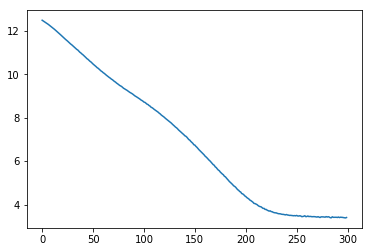

In [76]:
plt.plot(range(epochs), losses)

In [77]:
torch.save(model.state_dict(), r'C:\Users\anCoderr\Documents\TaxiModel.pt')